#***Assignment 1 Airlines***

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [ ]:
# Import dataset
airline =pd.read_excel(r"EastWestAirlines.xlsx", sheet_name= 'data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
#Drop the ID# Column
airline2=airline.drop(['ID#'], axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airline2.iloc[:,0:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


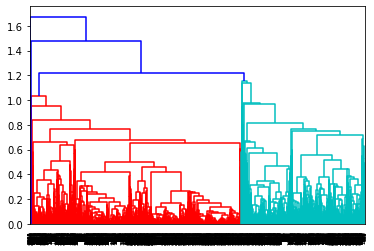

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

#***Heirarchical CLustering***

In [ ]:
#Create Clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage= 'average')

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [ ]:
df_norm['h_clusterid'] = Clusters


In [ ]:
df_norm.sort_values('h_clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.0,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1513,0.073189,0.152853,0.00,0.0,0.0,0.043855,0.093023,0.022715,0.037736,0.584157,1.0,0
1512,0.002803,0.000000,0.00,0.0,0.0,0.002275,0.023256,0.000000,0.000000,0.593682,1.0,0
3162,0.060535,0.000000,0.00,0.0,0.0,0.012136,0.046512,0.006490,0.037736,0.187364,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.0,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.000000,0.000000,0.00,0.0,0.0,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,3
3235,0.168364,0.000000,0.00,0.0,0.0,0.099213,0.674419,0.417724,1.000000,0.273692,1.0,3
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,3


#**K Means Clustering**

In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline2.iloc[:,1:])

In [ ]:
scaled_airline_df

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [ ]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

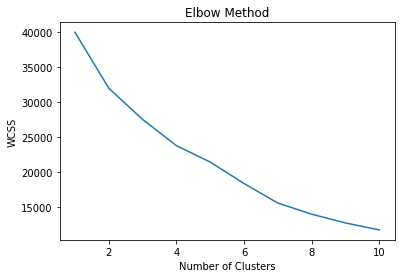

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Build Cluster Algorithm
clusters_new= KMeans(4, random_state= 30)
clusters_new.fit(scaled_airline_df)

KMeans(n_clusters=4, random_state=30)

In [ ]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
# Assign Clusters to the Data Set
airline3 = airline2.copy()
airline3['Clusterid_new']= clusters_new.labels_
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [ ]:
# Group Data by Cluster (K= 4)
airline3.groupby('Clusterid_new').agg(['mean']).reset_index()

,Clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,166838.595238,726.053571,2.148810,1.047619,1.000000,31024.875000,26.970238,5381.720238,15.672619,4635.761905,0.803571
1,1,113103.153846,151.891498,3.755466,1.002429,1.001619,39944.788664,18.944130,320.649393,0.965992,4875.480162,0.657490
2,2,48256.299496,102.893840,1.234018,1.018210,1.000387,4885.443239,6.992639,206.134057,0.636575,3719.831461,0.203797
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


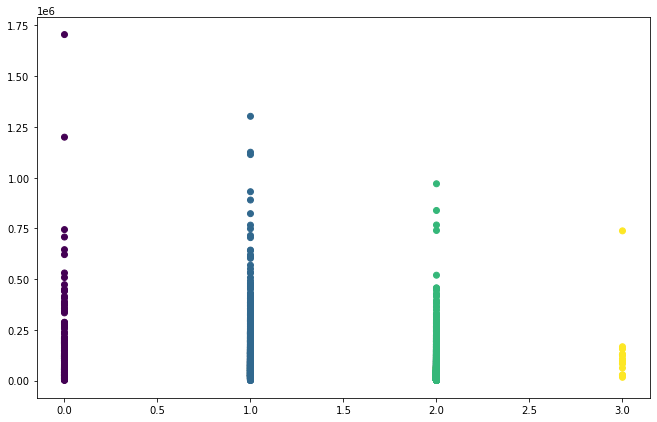

In [ ]:
# Plot Clusters
plt.figure(figsize=(11,7))
plt.scatter(airline3['Clusterid_new'],airline3['Balance'], c=clusters_new.labels_) 

In [ ]:
airline3[airline3['Clusterid_new']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid_new
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,126873,0,4,1,5,95598,32,500,1,3880,1,3


#DBSCAN CLUSTERING

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=7) #Where eps= Epslion , min_sample = min point
dbscan.fit(scaled_airline_df)

DBSCAN(eps=3, min_samples=7)

In [ ]:
#Noisy samples are -1
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cl= pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [ ]:
clustered= pd.concat([airline2,cl], axis=1)
clustered[clustered['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
151,930410,0,5,1,1,211284,18,2250,6,7640,1,-1
190,123516,0,5,1,1,240544,31,500,2,7507,1,-1
343,112501,0,1,1,2,19140,11,0,0,7101,0,-1
380,377252,0,5,1,1,230629,30,6393,13,6996,1,-1
384,28193,0,5,1,4,103456,32,0,0,6980,1,-1
420,529886,7210,1,1,1,23866,26,7741,15,8296,1,-1
531,98472,1776,5,1,1,124421,45,10250,28,6621,1,-1
534,267404,0,5,1,1,263685,51,3000,6,6584,1,-1


In [ ]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
clustered.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,174610.254902,1611.196078,2.882353,1.117647,1.960784,75650.294118,31.235294,5414.137255,13.058824,4568.803922,0.803922
1,0,72531.509337,126.411614,2.058327,1.000000,1.000000,16421.467639,11.306728,397.449220,1.226401,4114.672806,0.365055
2,1,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692
3,2,52331.000000,0.000000,1.153846,2.000000,1.000000,11544.653846,15.230769,223.576923,0.807692,3812.307692,0.346154


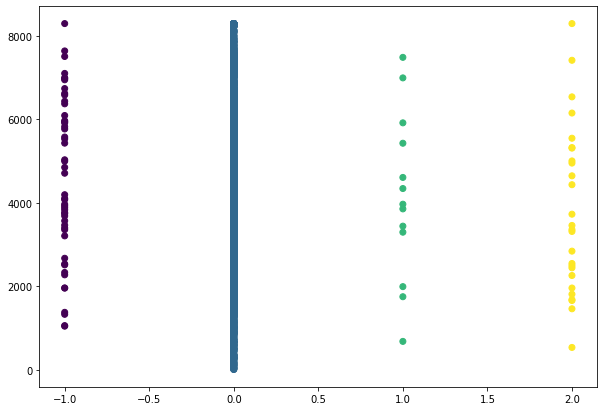

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(clustered['cluster'],clustered['Days_since_enroll'], c=dbscan.labels_) 

#Assignment 2 - Crime Data


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Import DataSet
crime = pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#EDA

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
# Normalise Data
crime_norm = StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,0:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


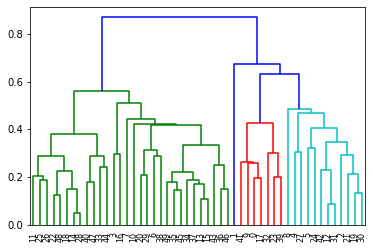

In [ ]:
#Create Dendrogram 
dendrogram = sch.dendrogram(sch.linkage(df_norm, method= 'average'))

#Heirarcical Clustering

In [ ]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage= 'average')

In [ ]:
# Save Cluster
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [ ]:
df_norm['h_clusterid'] = Clusters

In [ ]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
28,0.078313,0.041096,0.406780,0.056848,0
34,0.391566,0.256849,0.728814,0.364341,0
26,0.210843,0.195205,0.508475,0.237726,0
25,0.313253,0.219178,0.355932,0.235142,0
48,0.108434,0.027397,0.576271,0.090439,0
35,0.349398,0.363014,0.610169,0.328165,0
22,0.114458,0.092466,0.576271,0.196382,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0


In [ ]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
28,0.078313,0.041096,0.406780,0.056848,0
34,0.391566,0.256849,0.728814,0.364341,0
26,0.210843,0.195205,0.508475,0.237726,0
25,0.313253,0.219178,0.355932,0.235142,0
48,0.108434,0.027397,0.576271,0.090439,0
35,0.349398,0.363014,0.610169,0.328165,0
22,0.114458,0.092466,0.576271,0.196382,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0


#**K_Means Clustering**

In [ ]:
#Normalizing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

In [ ]:
scaled_crime_df

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

In [ ]:
# Use Elbow Graph to find optimum number of Clusters (K Value) from K Value Range
from sklearn.cluster import KMeans

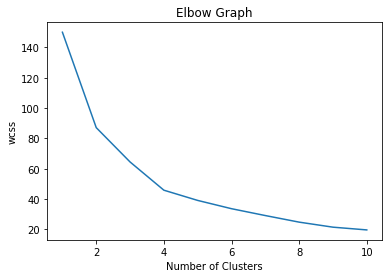

In [ ]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=2)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Build Clusters
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)


KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 1, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 1, 3, 3, 1], dtype=int32)

In [ ]:
#Assign clusterss to Data
crime2=crime.copy()
crime2['Clusterid_new']=clusters_new.labels_
crime2

,Murder,Assault,UrbanPop,Rape,Clusterid_new
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [ ]:
# Group Data by Clusters K = 4
crime2.groupby('Clusterid_new').agg(['mean']).reset_index()

,Clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.960000,138.750000,73.000000,19.280000
2,2,10.809091,269.727273,76.181818,34.345455
3,3,3.618182,77.000000,49.909091,11.536364


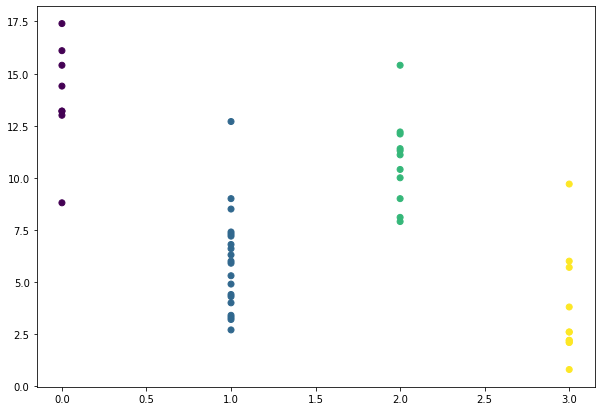

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['Clusterid_new'],crime2['Murder'], c=clusters_new.labels_)

In [ ]:
crime2[crime2['Clusterid_new']==3]

,Murder,Assault,UrbanPop,Rape,Clusterid_new
11,2.6,120,54,14.2,3
14,2.2,56,57,11.3,3
16,9.7,109,52,16.3,3
18,2.1,83,51,7.8,3
25,6.0,109,53,16.4,3
28,2.1,57,56,9.5,3
33,0.8,45,44,7.3,3
40,3.8,86,45,12.8,3
44,2.2,48,32,11.2,3
47,5.7,81,39,9.3,3


In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new1 = KMeans(3, random_state=30)
clusters_new1.fit(scaled_crime_df)

KMeans(n_clusters=3, random_state=30)

In [ ]:
clusters_new1.labels_

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
# Assign clusters to the data set
crime3=crime2.copy()
crime3['Clusterid_new1']=clusters_new1.labels_
crime3

,Murder,Assault,UrbanPop,Rape,Clusterid_new,Clusterid_new1
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,2,1
2,8.1,294,80,31.0,2,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,2,1
5,7.9,204,78,38.7,2,1
6,3.3,110,77,11.1,1,2
7,5.9,238,72,15.8,1,2
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,0,1


In [ ]:
# Group data by Clusters (K=3)
crime3.groupby('Clusterid_new1').agg(['mean']).reset_index()

,Clusterid_new1,Murder,Assault,UrbanPop,Rape,Clusterid_new
,,mean,mean,mean,mean,mean
0,0,4.976923,99.692308,49.461538,12.576923,2.538462
1,1,11.605000,250.250000,69.550000,29.775000,1.250000
2,2,5.447059,131.588235,73.117647,17.800000,1.000000


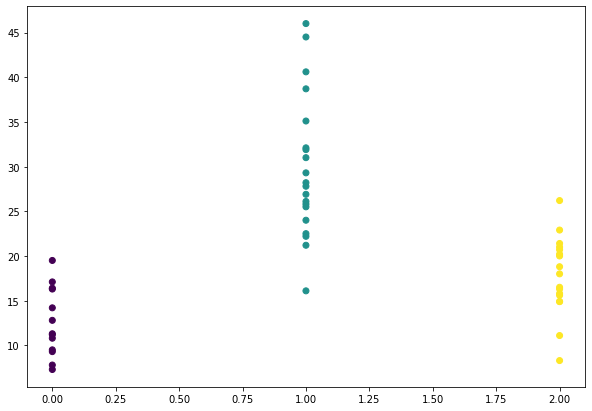

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['Clusterid_new1'],crime3['Rape'], c=clusters_new1.labels_)

#**DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(scaled_crime_df)

DBSCAN(eps=1, min_samples=4)

In [ ]:
# Noisy samples= -1
dbscan.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
#Adding Clusters to Data Set
crime['Clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [ ]:
crime.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.400000,263.666667,73.333333,43.700000
1,0,7.621277,164.829787,65.042553,19.797872


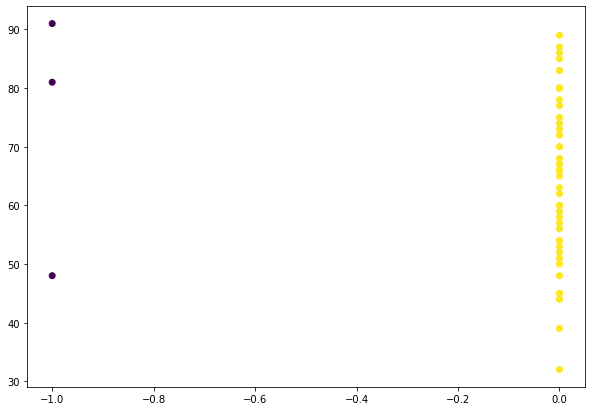

In [38]:
#Plot Clusters
plt.figure(figsize=(10,7))
plt.scatter(crime['Clusters'], crime['UrbanPop'], c=dbscan.labels_)